In [1]:
import numpy as np
from scipy.spatial.transform import Rotation as R
from scipy.spatial import distance
from scipy.interpolate import CubicSpline
from dataclasses import dataclass

@dataclass
class Sketch:
    vertices: np.ndarray
    direction: np.ndarray

    def from_2d_homogeneous(x, y, z, unit_vec, rotation_matrix, translation_vector):
        pts_2d_homogeneous = np.stack([x, y, z])
        # project_to_rays(pt1_2d_homogeneous, rotation_matrix, translation_vector, unit_vec)

        rays_3d = []
        for pt_2d in pts_2d_homogeneous.T:

            # Apply the rotation matrix and translation to get the ray in 3D
            # ray_origin = translation_vector
            # print(rotation_matrix)
            # ray_origin = translation_vector + rotation_matrix @ pt_2d  # 3D direction vector

            # ray_direction = rotation_matrix @ unit_vec
            rays_3d.append(translation_vector + rotation_matrix @ pt_2d)
        # return rays_3d

        return Sketch(
            vertices=np.array(rays_3d),
            direction=rotation_matrix @ unit_vec,
        )


# # Example: Define two arbitrary 2D curves in space
# # Generate random t values for each curve
# t1 = np.sort(np.random.rand(80))  # Random t for curve 1
# t2 = np.sort(np.random.rand(90)) * 2 - 2  # Random t for curve 2

# np.random.seed(0)
# # Random translation vectors for both curves
# translation_vector1 = np.random.uniform(-3, 3, 3)  # Random translation for curve 1
# translation_vector2 = np.random.uniform(-3, 3, 3)  # Random translation for curve 2
# translation_vector1[2] = translation_vector1[2] - 2
# translation_vector1[1] = translation_vector1[0] + 3

# np.random.seed(0)
# print(random_rotation_matrix())
# print(random_rotation_matrix())

t1 = np.array(
    [
        0.0013833499989991394,
        0.0038603515102610952,
        0.02895254902696054,
        0.04680635471218875,
        0.06560486720992564,
        0.06614946211695472,
        0.08053200347184408,
        0.0813695988533053,
        0.08531092311870336,
        0.10001406092155518,
        0.11738029417055718,
        0.15336887785934572,
        0.1598452868541913,
        0.16212026070883323,
        0.16604782452124567,
        0.1785799680576563,
        0.19959614212011434,
        0.2164572609442098,
        0.22139644629277222,
        0.22286381801498023,
        0.24488947942009942,
        0.24768502249231594,
        0.26090449938105975,
        0.26503969836448205,
        0.26720703186231864,
        0.2773402713052435,
        0.2940766623831661,
        0.3004036831584872,
        0.3182335091770624,
        0.3361022663998874,
        0.3494402920485349,
        0.3645446259967866,
        0.3649118360212381,
        0.3719187485124613,
        0.37321595574479416,
        0.37638915519435123,
        0.37674126696098675,
        0.39256878846215104,
        0.43298420628118073,
        0.44458728781130075,
        0.45309424544887844,
        0.4564095653390666,
        0.458503167066445,
        0.4939578339872235,
        0.4959702953734696,
        0.5010631728347521,
        0.5076355472407649,
        0.5181498137911743,
        0.5207614372418605,
        0.52437981107722,
        0.5282340891785358,
        0.5495005727952714,
        0.559682405823448,
        0.6128667531169923,
        0.6756891476442668,
        0.6817399450693612,
        0.6907847761565296,
        0.7196201578422882,
        0.7510216488563984,
        0.7592824517166681,
        0.7734555444490305,
        0.7814796002346613,
        0.7918795696309013,
        0.8427768626848423,
        0.8562761796227819,
        0.8587774682319022,
        0.8773987891741196,
        0.8783724953799941,
        0.8806781230470796,
        0.8818965030968323,
        0.8956912912102034,
        0.9227566102253654,
        0.9272118073731179,
        0.9308187172979732,
        0.9450267769403914,
        0.9661474456271714,
        0.9663899714378934,
        0.9707314427706328,
        0.9873487570739682,
        0.9918903291546294,
    ]
)
t2 = np.array(
    [
        -1.9989080702060087,
        -1.9896940714619535,
        -1.920014396198566,
        -1.9013021064231206,
        -1.8728924503276831,
        -1.8492818618333193,
        -1.7951724830951672,
        -1.785578509142908,
        -1.7847645897008362,
        -1.7751453655753775,
        -1.7686762561899734,
        -1.7649487141927247,
        -1.7218545977027744,
        -1.7193679641531612,
        -1.7043973318692192,
        -1.687233302264074,
        -1.6817075261155143,
        -1.6540972914576872,
        -1.6459884368650082,
        -1.6339334158401577,
        -1.5834934957570324,
        -1.575131277411918,
        -1.5692035913135236,
        -1.515642811747829,
        -1.5068861203776878,
        -1.4992035742928544,
        -1.4861667126266618,
        -1.4343262956478342,
        -1.4228600846966089,
        -1.4142228699459707,
        -1.3916026168011844,
        -1.3207379116676017,
        -1.2961275190086186,
        -1.285150696810574,
        -1.2820094433207359,
        -1.2529779716886327,
        -1.2451868548222254,
        -1.2164061228706684,
        -1.1939479951914227,
        -1.1833941833205104,
        -1.1805475887385128,
        -1.1637815765039983,
        -1.1506739943188142,
        -1.1491965492898906,
        -1.1461912795778526,
        -1.0537140430687115,
        -1.0412309012216239,
        -1.033212929595216,
        -1.0329637451450826,
        -1.0246473529235849,
        -0.9687233066974965,
        -0.9461851018956393,
        -0.8635648126603099,
        -0.8071338693007546,
        -0.7995742637374121,
        -0.7885760854594424,
        -0.7566691270934844,
        -0.7250754452555868,
        -0.720589787849746,
        -0.6116842972617489,
        -0.58192907963342,
        -0.5790884809910168,
        -0.5698948050696659,
        -0.544223683260977,
        -0.5334217313665479,
        -0.5254428405716642,
        -0.5095340799357417,
        -0.46006562749982227,
        -0.4436568090994917,
        -0.39421325687733155,
        -0.3812700570216032,
        -0.3761228766179614,
        -0.36532177707675717,
        -0.36393338848832313,
        -0.3142902243290857,
        -0.31153007689395174,
        -0.283324722731475,
        -0.25120016585031535,
        -0.23543265616178521,
        -0.22188009362054273,
        -0.20491447070118896,
        -0.17027382433323424,
        -0.16098518618835866,
        -0.15338938488258336,
        -0.13521212207901123,
        -0.13487759228531915,
        -0.1257659161189646,
        -0.09133236921461596,
        -0.07360540947923999,
        -0.048232263162933275,
    ]
)

translation_vector1 = np.array([0.29288102, 3.29288102, -1.38341974])
translation_vector2 = np.array([0.2692991, -0.4580712, 0.87536468])
rotation_matrix1 = np.array(
    [
        [0.17330128, -0.80905588, -0.56160062],
        [0.1305673, 0.58406928, -0.80113373],
        [0.97617562, 0.06551083, 0.20685619],
    ]
)
rotation_matrix2 = np.array(
    [
        [0.5397863, -0.68409308, 0.49055826],
        [0.70401973, 0.68634383, 0.18245102],
        [-0.46150511, 0.24687813, 0.85209402],
    ]
)


# Function to generate a random rotation matrix
def random_rotation_matrix():
    # Random rotation angles (Euler angles in radians)
    rotation_angles = np.random.uniform(0, 2 * np.pi, 3)
    rotation = R.from_euler("xyz", rotation_angles)
    return rotation.as_matrix()


def ray_intersection(
    ray1_origin, ray1_direction, ray2_origin, ray2_direction, enforce_positive_dir=True
):

    # Vector between the origins of the two rays
    origin_diff = ray2_origin - ray1_origin

    # Cross product of the two directions (this gives us a perpendicular vector)
    cross_product = np.cross(ray1_direction, ray2_direction)

    # If the directions are parallel (cross product is zero), the rays do not intersect
    if np.linalg.norm(cross_product) == 0:
        # If the rays are parallel, return None or some special case (handle parallel rays separately)
        return None

    # Calculate the parameters t and s that minimize the distance
    # t and s are the scaling factors along ray1 and ray2 respectively to minimize the distance
    t = (
        np.dot(np.cross(origin_diff, ray2_direction), cross_product)
        / np.linalg.norm(cross_product) ** 2
    )
    s = (
        np.dot(np.cross(origin_diff, ray1_direction), cross_product)
        / np.linalg.norm(cross_product) ** 2
    )

    if enforce_positive_dir:
        # If either t or s is negative, the intersection is behind the ray origin, which is not valid
        if t < 0 or s < 0:
            return None  # Intersection occurs in the backward direction of at least one ray

    # Calculate the closest points on the two rays
    closest_point_on_ray1 = ray1_origin + t * ray1_direction
    closest_point_on_ray2 = ray2_origin + s * ray2_direction

    # The intersection point is the average of the closest points on both rays
    intersection_point = (closest_point_on_ray1 + closest_point_on_ray2) / 2.0

    return intersection_point


# Curve 1 (XY-plane) - e.g., a sine curve
line1 = Sketch.from_2d_homogeneous(
    x=t1**2,
    # x = np.cos(2 * np.pi * t1),
    y=np.sin(2 * np.pi * t1),
    z=np.zeros(len(t1)),
    unit_vec=np.array([0.0, 0.0, 1.0]),
    rotation_matrix=rotation_matrix1,
    translation_vector=translation_vector1,
)

# Curve 2 (XZ-plane) - e.g., a sine curve
line2 = Sketch.from_2d_homogeneous(
    x=np.cos(2 * np.pi * t2),
    y=np.zeros(len(t2)),
    # z = np.sin(2 * np.pi * t2),
    z=t2,
    unit_vec=np.array([0.0, 1.0, 0.0]),
    rotation_matrix=rotation_matrix2,
    translation_vector=translation_vector2,
)


# Step 2: Compute intersection of the rays
intersection_points = []
# for (ray1_origin, ray1_direction), (ray2_origin, ray2_direction) in zip(line1, line2):
for ray1_origin, ray2_origin in zip(line1.vertices, line2.vertices):
    intersection = ray_intersection(
        ray1_origin, line1.direction, ray2_origin, line2.direction
    )
    if intersection is None:
        print("oh no, no intersection")
    else:
        intersection_points.append(intersection)

# Convert the list of intersection points into a numpy array
intersection_points = np.array(intersection_points)

DO_SPLINE = False
DO_SPLINE = True
if not DO_SPLINE:
    curve = np.array(intersection_points)

else:
    # Step 3: Interpolate 3D points to create a smooth curve (using cubic spline)
    if (
        intersection_points.shape[0] > 3
    ):  # Ensure there are enough points to interpolate
        spline_x = CubicSpline(
            np.arange(len(intersection_points)), intersection_points[:, 0]
        )
        spline_y = CubicSpline(
            np.arange(len(intersection_points)), intersection_points[:, 1]
        )
        spline_z = CubicSpline(
            np.arange(len(intersection_points)), intersection_points[:, 2]
        )

        # Generate a finer set of points for the smooth 3D curve
        t_fine = np.linspace(0, len(intersection_points) - 1, 500)
        x_fine = spline_x(t_fine)
        y_fine = spline_y(t_fine)
        z_fine = spline_z(t_fine)

        curve = np.stack([x_fine, y_fine, z_fine], axis=-1)
    else:
        # Handle the case where there are too few intersection points
        print("Not enough intersection points to interpolate a curve.")
        x_fine, y_fine, z_fine = [], [], []

## Plotly

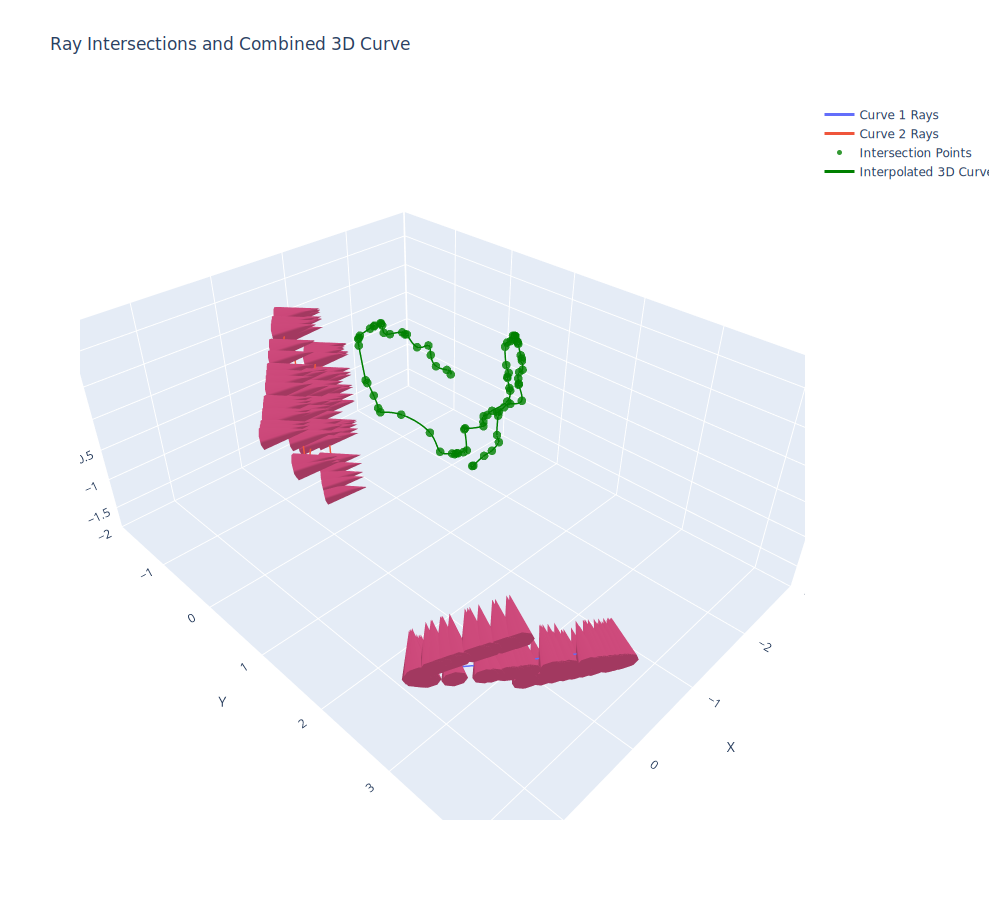

In [2]:
import plotly.graph_objects as go

# Step 4: Plot the original 2D curves and the reconstructed 3D intersection curve using Plotly
fig = go.Figure()

def plot_ray(line, name: str):
    # Plot the original rays (representing the 2D curves in 3D)
    for ray_origin in line.vertices:
        fig.add_trace(
            go.Cone(
                x=[ray_origin[0]],
                y=[ray_origin[1]],
                z=[ray_origin[2]],
                u=[line.direction[0]],
                v=[line.direction[1]],
                w=[line.direction[2]],
                # sizeref=.08,
                # colorscale="Blues",
                showscale=False,
                name=name,
            )
        )
    fig.add_trace(
        go.Scatter3d(
            x=line.vertices[:, 0],
            y=line.vertices[:, 1],
            z=line.vertices[:, 2],
            mode="lines",
            line=dict(
                # color="Blue",
                width=3
            ),
            name=name,
        )
    )


plot_ray(line1, name="Curve 1 Rays")
plot_ray(line2, name="Curve 2 Rays")


# Plot the intersection points
if intersection_points.shape[0] > 0:
    fig.add_trace(
        go.Scatter3d(
            x=intersection_points[:, 0],
            y=intersection_points[:, 1],
            z=intersection_points[:, 2],
            mode="markers",
            marker=dict(size=5, color="green", opacity=0.8),
            name="Intersection Points",
        )
    )

# Plot the smooth 3D curve from the intersection points
if len(x_fine) > 0:
    fig.add_trace(
        go.Scatter3d(
            x=curve[:, 0],
            y=curve[:, 1],
            z=curve[:, 2],
            mode="lines",
            line=dict(color="green", width=3),
            name="Interpolated 3D Curve",
        )
    )

# Layout settings for Plotly
fig.update_layout(
    title="Ray Intersections and Combined 3D Curve",
    scene=dict(xaxis_title="X", yaxis_title="Y", zaxis_title="Z"),
    width=1000,
    height=900,
    showlegend=True,
)

# Show the plot
fig.show(renderer="svg")

## Matplotlib

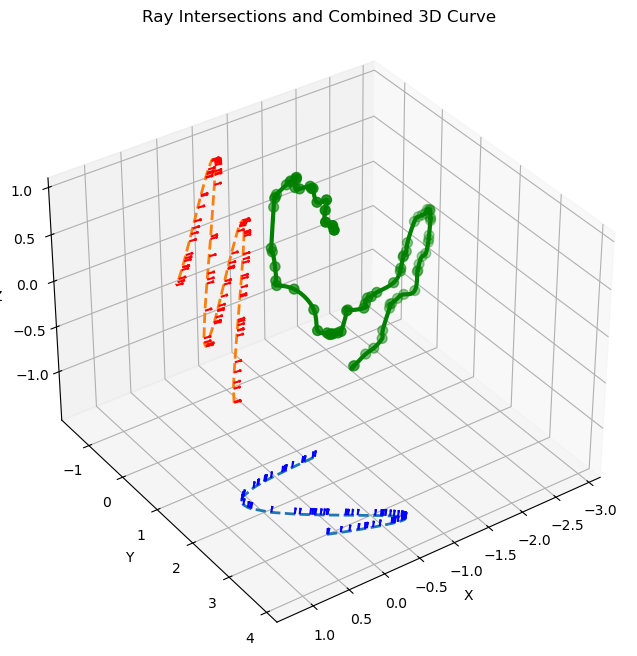

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to plot rays as arrows using quiver
def plot_ray(ax, line, name: str):
    # Plot rays as arrows
    for ray_origin in line.vertices:
        ax.quiver(
            ray_origin[0], ray_origin[1], ray_origin[2],  # Start point
            line.direction[0], line.direction[1], line.direction[2],  # Direction vector
            length=0.1,  # Length of the arrows
            normalize=True,  # Normalize direction vector
            color='b' if name == 'Curve 1 Rays' else 'r',  # Blue for curve 1, red for curve 2
            label=name
        )
    # Plot the original vertices (as a line)
    ax.plot(line.vertices[:, 0], line.vertices[:, 1], line.vertices[:, 2], label=f"{name} (Vertices)", linewidth=2, linestyle='--')

# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the rays (lines and directions)
plot_ray(ax, line1, name="Curve 1 Rays")
plot_ray(ax, line2, name="Curve 2 Rays")

# Plot the intersection points
if intersection_points.shape[0] > 0:
    ax.scatter(
        intersection_points[:, 0],
        intersection_points[:, 1],
        intersection_points[:, 2],
        c="green", marker="o", s=50, label="Intersection Points"
    )

# Plot the smooth 3D curve (if available)
if len(x_fine) > 0:
    ax.plot(
        curve[:, 0], curve[:, 1], curve[:, 2], 
        color="green", linewidth=3, label="Interpolated 3D Curve"
    )

# Add labels and title
ax.set_title("Ray Intersections and Combined 3D Curve")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

# Show legend
# ax.legend()
ax.view_init(35, 55, 0)

# Show plot
plt.show()
